# Una introducción a t-SNE


El algoritmo de incrustación de vecinos estocásticos distribuidos en t (t-Distributed Stochastic Neighbor Embedding , t-SNE) es una técnica no lineal y no supervisada que se utiliza principalmente para la exploración de datos y la visualización de datos de alta dimensión. En términos más simples, t-SNE le da una idea o intuición de cómo se organizan los datos en un espacio de alta dimensión. Fue desarrollado por Laurens van der Maatens y Geoffrey Hinton en 2008.

A diferencia de PCA, que es una técnica de reducción de dimensión lineal que busca maximizar la varianza y preservar grandes distancias, veremos que en formas geométricas como cilindro, bola, curva, etc. el tSNE, al preservar solo pequeñas distancias por pares y similitudes locales  permitiría una visualización correcta sobre la estructura de los datos.

![Ejemplo](https://miro.medium.com/proxy/1*vNMeKlFkTs9gb_6B93s-yA.png)


## Cómo funciona t-SNE
El algoritmo t-SNE calcula una medida de similitud entre pares de instancias en el espacio de alta dimensión y en el espacio de baja dimensión. Luego intenta optimizar estas dos medidas de similitud utilizando una función de costo. 

Dividamos eso en 3 pasos básicos.

1. **Paso 1, mida las similitudes entre puntos en el espacio de alta dimensión.** Piense en un montón de puntos de datos dispersos en un espacio 2D (Figura 2). Para cada punto de datos (xi), centraremos una distribución gaussiana sobre ese punto. Luego medimos la densidad de todos los puntos (xj) bajo esa distribución gaussiana. Luego renormalizamos todos los puntos y obtendremos un conjunto de probabilidades (Pij) para todos los puntos. Esas probabilidades son proporcionales a las similitudes. Todo lo que eso significa es que, si los puntos de datos x1 y x2 tienen valores iguales bajo este círculo gaussiano, entonces sus proporciones y similitudes son iguales y, por lo tanto, tiene similitudes locales en la estructura de este espacio de alta dimensión. La distribución o círculo gaussiano se puede manipular usando lo que se llama perplejidad, que influye en la varianza de la distribución (tamaño del círculo) y esencialmente en el número de vecinos más cercanos. El rango normal de perplejidad está entre 5 y 50.

![Paso1](https://miro.medium.com/proxy/1*1dWlX9m9ZOcZ77uhpl21RA.png)

2. **El paso 2 es similar al paso 1**, pero en lugar de usar una distribución gaussiana, usa una distribución t de Student con grado de libertad 1, también se conoce como distribución de Cauchy. Esto nos da un segundo conjunto de probabilidades (Qij) en el espacio de baja dimensión. Como puede ver, la distribución t de Student tiene colas más pesadas que la distribución normal. Las colas pesadas permiten un mejor modelado de distancias alejadas.

![Paso 2](https://miro.medium.com/proxy/1*bLzoEHeWHZIMas9vJb7ctA.png)

3. **El último paso es que queremos que este conjunto de probabilidades del espacio de baja dimensión (Qij) refleje las del espacio de alta dimensión (Pij) lo mejor posible.** Queremos que las dos funciones sean similares. Medimos la diferencia entre las distribuciones de probabilidad de los espacios bidimensionales utilizando la divergencia de Kullback-Liebler (KL), una medida entrópica, que compara de manera eficiente valores grandes de Pij y Qij. Finalmente, usamos el descenso de gradiente para minimizar nuestra función de costo KL.


## Casos t-SNE

Ahora que sabe cómo funciona t-SNE, hablemos rápidamente sobre dónde se usa. [Laurens van der Maaten](https://lvdmaaten.github.io/tsne/) muestra muchos ejemplos. Menciona el uso de t-SNE en áreas como investigación climática, seguridad informática, bioinformática, investigación del cáncer, etc. t-SNE podría usarse en datos de alta dimensión y luego la salida de esas dimensiones se convierte en entradas para algún otro modelo de clasificación .

Además, t-SNE podría usarse para investigar, aprender o evaluar la segmentación. Muchas veces seleccionamos el número de segmentos antes de modelar o iteramos después de los resultados. t-SNE a menudo puede mostrar una clara separación en los datos. Esto se puede usar antes de usar su modelo de segmentación para seleccionar un número de clúster o después para evaluar si sus segmentos realmente se mantienen. Sin embargo, t-SNE no es un enfoque de agrupación, ya que no conserva las entradas como PCA y los valores a menudo pueden cambiar entre ejecuciones, por lo que es puramente para exploración.

## Código

A continuación se muestra un código de Python donde puede ver la comparación visual entre PCA y t-SNE en los conjuntos de datos Digits y MNIST. Se usan ambos conjuntos de datos debido a las diferencias de dimensionalidad y, por lo tanto, a las diferencias en los resultados. También muestro una técnica en el código donde puede ejecutar PCA antes de ejecutar t-SNE. Esto se puede hacer para reducir el cálculo y, por lo general, reduciría a ~ 30 dimensiones y luego ejecutaría t-SNE.

Ejecuté esto usando Python y llamando a las bibliotecas SAS. Puede parecer un poco diferente de lo que está acostumbrado y puede verlo en las imágenes a continuación.



In [7]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time



Creamos los datos

circles, perplexity=5 in 1.4 sec
circles, perplexity=30 in 1.4 sec
circles, perplexity=50 in 1.4 sec
circles, perplexity=100 in 1.6 sec
S-curve, perplexity=5 in 1.2 sec
S-curve, perplexity=30 in 1.1 sec
S-curve, perplexity=50 in 0.97 sec
S-curve, perplexity=100 in 2.5 sec
uniform grid, perplexity=5 in 1.4 sec
uniform grid, perplexity=30 in 1.8 sec
uniform grid, perplexity=50 in 1.6 sec
uniform grid, perplexity=100 in 2 sec


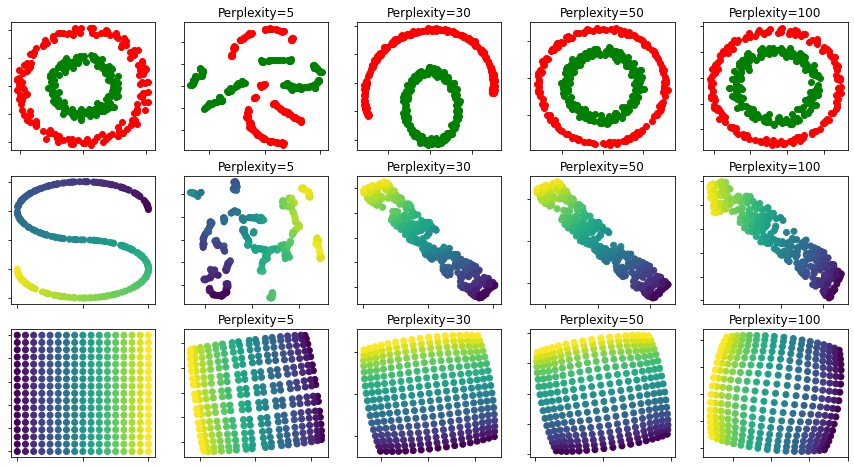

In [8]:
n_samples = 300
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')


plt.show()